## PROJECT ON LENDING CASE STUDY

## Introduction


The case study's objective is to demonstrate the practical application of Exploratory Data Analysis (EDA) in a real business context. Alongside implementing learned EDA techniques, participants will gain insight into risk analytics within the banking and financial services sector. The study emphasizes understanding how data is leveraged to mitigate the risk of financial loss when lending to customers. Overall, it aims to provide a hands-on experience in using EDA for effective risk management in a business setting.

### Business Understanding


In a consumer finance company specializing in lending to urban customers, the decision-making process for loan approval involves managing two types of risks:

####  Risk of Lost Business: 
      
    If the applicant is likely to repay the loan, rejecting the application results in a missed business opportunity for the company. This risk involves potential loss of revenue and customer engagement.

####  Risk of Default: 

    On the other hand, if the applicant is not likely to repay the loan and is prone to default, approving the loan poses a financial risk for the company. This risk involves potential losses due to non-repayment by the borrower.

Balancing these two risks is crucial for the company to make sound lending decisions, ensuring both business growth and financial stability. Effective risk assessment and analysis of applicant profiles are essential components of this decision-making process.

#### Sceanrios


When a person applies for a loan, the company can make two types of decisions:

####  Loan Accepted:

  - Fully Paid: The applicant has successfully repaid both the principal and interest on the loan.
  - Current: The applicant is currently in the process of repaying the loan, and the tenure is not yet completed. These    candidates are not considered as 'defaulted.'
  - Charged-off: The applicant has failed to pay the instalments for an extended period, resulting in a default on the loan.

#### Loan Rejected:

The company rejects the loan application due to various reasons, such as not meeting their requirements. As a result, there is no transactional history available for these rejected applicants in the company's dataset.
The company evaluates loan applications based on these outcomes, managing the different scenarios for accepted loans and acknowledging the absence of transactional history for rejected applicants in the dataset.

### Objective

The company, identified as the largest online loan marketplace, offers personal loans, business loans, and medical procedure financing through a user-friendly online platform with lower interest rates. However, similar to other lending companies, dealing with loans to "risky" applicants poses a significant financial risk, termed as credit loss. Credit loss refers to the money lost when borrowers default on their payments. In this context, customers labeled as 'charged-off' are considered defaulters.

The case study's primary objective is to employ Exploratory Data Analysis (EDA) to identify risky loan applicants. By understanding the driving factors or variables strongly indicative of loan default, the company aims to reduce credit loss. This knowledge can be utilized for portfolio management and risk assessment, enabling more informed decision-making in the lending process.

### Importing Required Libraries

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
###just to ingnore warnings
import warnings
warnings.filterwarnings('ignore')

### Reading the loan Dataset

In [2]:
loan = pd.read_csv("loan.csv")
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
loan.shape

(39717, 111)

In [4]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


### Dealing with Missing Values
As we can see a lot of missing value in description.

In [5]:
len(loan.index)

39717

In [6]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
def null_percentage(dataframe):

    # Calculate the percentage of null values for each column
    null_percentages = (dataframe.isnull().sum() / len(dataframe)) * 100

    return null_percentages

# Example Usage:
# Assuming 'your_dataframe' is your actual DataFrame
# Replace 'your_dataframe' with the actual variable name of your DataFrame
result = null_percentage(loan)

# Print or use the result as needed
print(result)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64


In [8]:
# Finding out columns with only null values

result_col = result[result>0]
result_col

emp_title                       6.191303
emp_length                      2.706650
desc                           32.580507
title                           0.027696
mths_since_last_delinq         64.662487
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 68, dtype: float64

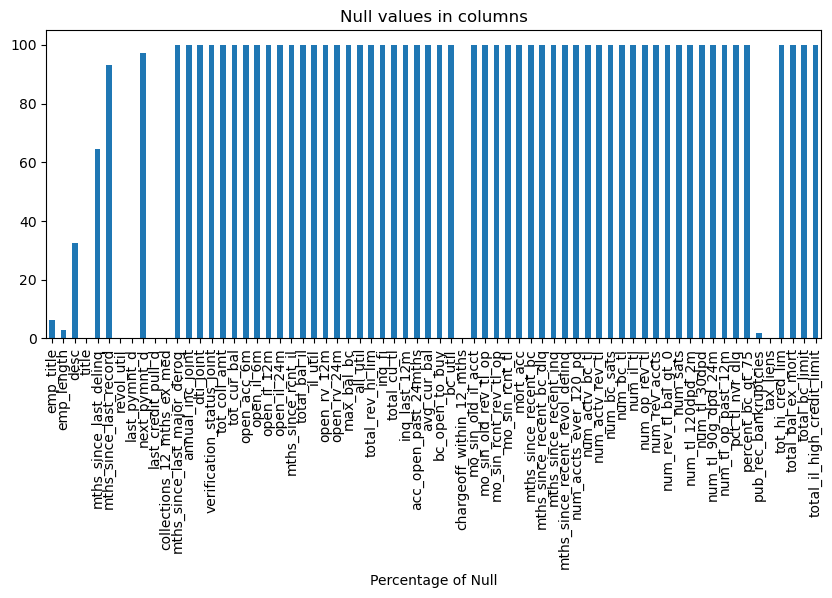

In [9]:
# Visualizing Null values of columns in graph

plt.figure(figsize = (10,4), dpi=100)
result_col.plot(kind = "bar")
plt.title("Null values in columns")
plt.xlabel('Percentage of Null')
plt.show()

From the graph it is quite clear that there are many variable whose missing values in more than 25%
let us try to find out those columns

In [10]:


result_col25 = result_col[result_col>25]
print("Number of columns with null value > 25% :", len(result_col25.index))
print(result_col25)



Number of columns with null value > 25% : 58
desc                               32.580507
mths_since_last_delinq             64.662487
mths_since_last_record             92.985372
next_pymnt_d                       97.129693
mths_since_last_major_derog       100.000000
annual_inc_joint                  100.000000
dti_joint                         100.000000
verification_status_joint         100.000000
tot_coll_amt                      100.000000
tot_cur_bal                       100.000000
open_acc_6m                       100.000000
open_il_6m                        100.000000
open_il_12m                       100.000000
open_il_24m                       100.000000
mths_since_rcnt_il                100.000000
total_bal_il                      100.000000
il_util                           100.000000
open_rv_12m                       100.000000
open_rv_24m                       100.000000
max_bal_bc                        100.000000
all_util                          100.000000
total_rev_

Removing those columns whole missing value is more than 25%

In [11]:

result_col25.index
loan.drop(labels = result_col25.index, axis=1, inplace = True)

In [12]:
loan.shape

(39717, 53)

In [13]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [14]:
###again checking the missing valiues
result = null_percentage(loan)

# Print or use the result as needed
print(result)

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

#### Dealing with missing values.

~   To analyze further we are dividning our columns into object and numerical column.

~   To deal with missing values we are replacing the column with most common values of that column.

In [15]:
def filter_columns_by_type(dataframe):
    """
    Filters out object (categorical) and numerical columns from a pandas DataFrame.

    Parameters:
    - dataframe: pandas DataFrame

    Returns:
    - tuple containing DataFrames: one with object columns and one with numerical columns
    """

    # Select object (categorical) columns
    object_columns = dataframe.select_dtypes(include='object')

    # Select numerical columns
    numerical_columns = dataframe.select_dtypes(exclude='object')

    return object_columns, numerical_columns

# Example Usage:
# Assuming 'your_dataframe' is your actual DataFrame
# Replace 'your_dataframe' with the actual variable name of your DataFrame
object_cols, numerical_cols = filter_columns_by_type(loan)

# Print or use the resulting DataFrames as needed
print("Object Columns:")
print(object_cols)

print("\nNumerical Columns:")
print(numerical_cols)

Object Columns:
             term int_rate grade sub_grade                   emp_title  \
0       36 months   10.65%     B        B2                         NaN   
1       60 months   15.27%     C        C4                       Ryder   
2       36 months   15.96%     C        C5                         NaN   
3       36 months   13.49%     C        C1         AIR RESOURCES BOARD   
4       60 months   12.69%     B        B5    University Medical Group   
...           ...      ...   ...       ...                         ...   
39712   36 months    8.07%     A        A4             FiSite Research   
39713   36 months   10.28%     C        C1  Squarewave Solutions, Ltd.   
39714   36 months    8.07%     A        A4                         NaN   
39715   36 months    7.43%     A        A2                         NaN   
39716   36 months   13.75%     E        E2            Evergreen Center   

      emp_length home_ownership verification_status issue_d  loan_status  ...  \
0      10+ yea

In [16]:
##job_title

object_cols

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,...,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,36 months,10.65%,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,...,credit_card,Computer,860xx,AZ,Jan-85,83.70%,f,Jan-15,May-16,INDIVIDUAL
1,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,...,car,bike,309xx,GA,Apr-99,9.40%,f,Apr-13,Sep-13,INDIVIDUAL
2,36 months,15.96%,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,...,small_business,real estate business,606xx,IL,Nov-01,98.50%,f,Jun-14,May-16,INDIVIDUAL
3,36 months,13.49%,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,...,other,personel,917xx,CA,Feb-96,21%,f,Jan-15,Apr-16,INDIVIDUAL
4,60 months,12.69%,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-11,Current,...,other,Personal,972xx,OR,Jan-96,53.90%,f,May-16,May-16,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,36 months,8.07%,A,A4,FiSite Research,4 years,MORTGAGE,Not Verified,Jul-07,Fully Paid,...,home_improvement,Home Improvement,802xx,CO,Nov-90,13.10%,f,Jul-10,Jun-10,INDIVIDUAL
39713,36 months,10.28%,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,Not Verified,Jul-07,Fully Paid,...,credit_card,Retiring credit card debt,274xx,NC,Dec-86,26.90%,f,Jul-10,Jul-10,INDIVIDUAL
39714,36 months,8.07%,A,A4,NaN,< 1 year,MORTGAGE,Not Verified,Jul-07,Fully Paid,...,debt_consolidation,MBA Loan Consolidation,017xx,MA,Oct-98,19.40%,f,Apr-08,Jun-07,INDIVIDUAL
39715,36 months,7.43%,A,A2,NaN,< 1 year,MORTGAGE,Not Verified,Jul-07,Fully Paid,...,other,JAL Loan,208xx,MD,Nov-88,0.70%,f,Jan-08,Jun-07,INDIVIDUAL


In [17]:
import pandas as pd

def replace_missing_with_most_common(dataframe):
    # Replace missing values with the most common value in each column
    dataframe_filled = dataframe.apply(lambda col: col.fillna(col.mode().iloc[0]))

    return dataframe_filled

# Example Usage:
# Assuming 'your_dataframe' is your actual DataFrame
# Replace 'your_dataframe' with the actual variable name of your DataFrame
object_cols_filled = replace_missing_with_most_common(object_cols)
numerical_cols_filled = replace_missing_with_most_common(numerical_cols)



In [18]:
numerical_cols_filled.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,162.87,24000.0,27.65,0,1,...,0.00,0.00,171.62,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,59.83,30000.0,1.00,0,5,...,117.08,1.11,119.66,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,84.33,12252.0,8.72,0,2,...,0.00,0.00,649.91,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,339.31,49200.0,20.00,0,1,...,0.00,0.00,357.48,0.0,1,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,67.79,80000.0,17.94,0,0,...,0.00,0.00,67.79,0.0,1,0,0.0,0,0.0,0.0


In [19]:
## from now there are no missing values in data sets
## now let us try to understand object cols
object_cols_filled.head()

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,...,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,36 months,10.65%,B,B2,US Army,10+ years,RENT,Verified,Dec-11,Fully Paid,...,credit_card,Computer,860xx,AZ,Jan-85,83.70%,f,Jan-15,May-16,INDIVIDUAL
1,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,...,car,bike,309xx,GA,Apr-99,9.40%,f,Apr-13,Sep-13,INDIVIDUAL
2,36 months,15.96%,C,C5,US Army,10+ years,RENT,Not Verified,Dec-11,Fully Paid,...,small_business,real estate business,606xx,IL,Nov-01,98.50%,f,Jun-14,May-16,INDIVIDUAL
3,36 months,13.49%,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,...,other,personel,917xx,CA,Feb-96,21%,f,Jan-15,Apr-16,INDIVIDUAL
4,60 months,12.69%,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-11,Current,...,other,Personal,972xx,OR,Jan-96,53.90%,f,May-16,May-16,INDIVIDUAL


Now we are seeing two columns which can be converted into numeric by removing percentages.

In [20]:

object_cols_filled['int_rate'] = pd.to_numeric(object_cols_filled['int_rate'].str.replace('%', ''), errors='coerce')
object_cols_filled['revol_util'] = pd.to_numeric(object_cols_filled['revol_util'].str.replace('%', ''), errors='coerce')

Univariate analysis of important objective type columns.

In [21]:
##interpret loan status
object_cols_filled.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [22]:
##interpret term rate
object_cols_filled.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

loan_status  Charged Off  Current  Fully Paid
term                                         
 36 months          3227        0       25869
 60 months          2400     1140        7081


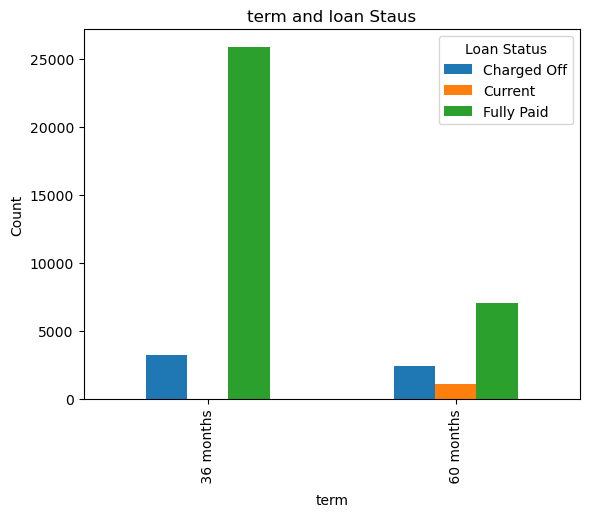

In [72]:
###bar plot of loan status and term rate
# Create a cross-tabulation
cross_tab = pd.crosstab(object_cols_filled['term'], object_cols_filled['loan_status'])

# Print the cross-tabulation
print(cross_tab)

# Plot the cross-tabulation as a bar chart
cross_tab.plot(kind='bar')
plt.xlabel('term')
plt.ylabel('Count')
plt.title('term and loan Staus')
plt.legend(title='Loan Status')
plt.show()

Conclusion 1 : The graph above distinctly indicates that loans with shorter terms are less likely to be charged off.

loan_status  Charged Off  Current  Fully Paid
emp_length                                   
1 year               456       71        2713
10+ years           1559      433        7962
2 years              567       97        3724
3 years              555       83        3457
4 years              462       94        2880
5 years              458       88        2736
6 years              307       61        1861
7 years              263       62        1448
8 years              203       44        1232
9 years              158       32        1068
< 1 year             639       75        3869


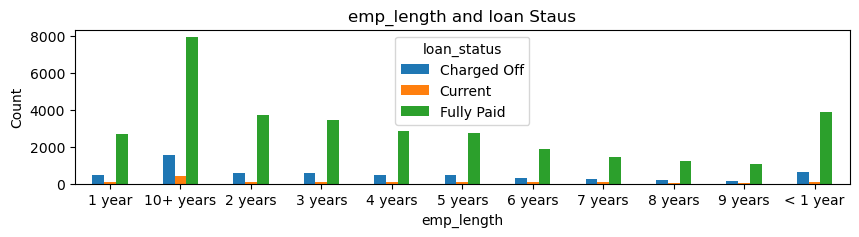

In [24]:
####interpret emp_length
object_cols_filled.emp_length.value_counts()
###bar plot of loan status and term rate
# Create a cross-tabulation
cross_tab = pd.crosstab(object_cols_filled['emp_length'], object_cols_filled['loan_status'])

# Print the cross-tabulation
print(cross_tab)

# Plot the cross-tabulation as a bar chart

cross_tab.plot(kind='bar', rot=0,figsize=(10,2))
plt.xlabel('emp_length')
plt.ylabel('Count')
plt.title('emp_length and loan Staus')
plt.legend(title='loan_status')
plt.show()

Conclusion 2 : The above graph does not provide a clear indication from which we can draw conclusion.

loan_status     Charged Off  Current  Fully Paid
home_ownership                                  
MORTGAGE               2327      638       14694
NONE                      0        0           3
OTHER                    18        0          80
OWN                     443       83        2532
RENT                   2839      419       15641


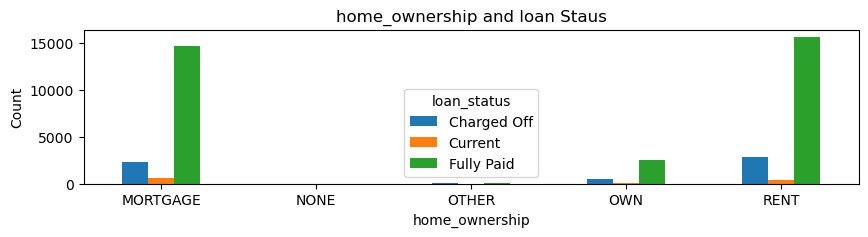

In [25]:
object_cols_filled.home_ownership.value_counts()

cross_tab = pd.crosstab(object_cols_filled['home_ownership'], object_cols_filled['loan_status'])

# Print the cross-tabulation
print(cross_tab)

# Plot the cross-tabulation as a bar chart

cross_tab.plot(kind='bar', rot=0,figsize=(10,2))
plt.xlabel('home_ownership')
plt.ylabel('Count')
plt.title('home_ownership and loan Staus')
plt.legend(title='loan_status')
plt.show()

##only 5 values good to keep

Conclusion 3: While the graph lacks a definitive indication to draw a clear conclusion, it is evident that a higher number of loans are extended to individuals with MORTGAGE and RENT as their home ownership status. Notably, those with RENT exhibit a lower likelihood of repaying the loan.

loan_status         Charged Off  Current  Fully Paid
purpose                                             
car                         160       50        1339
credit_card                 542      103        4485
debt_consolidation         2767      586       15288
educational                  56        0         269
home_improvement            347      101        2528
house                        59       14         308
major_purchase              222       37        1928
medical                     106       12         575
moving                       92        7         484
other                       633      128        3232
renewable_energy             19        1          83
small_business              475       74        1279
vacation                     53        6         322
wedding                      96       21         830


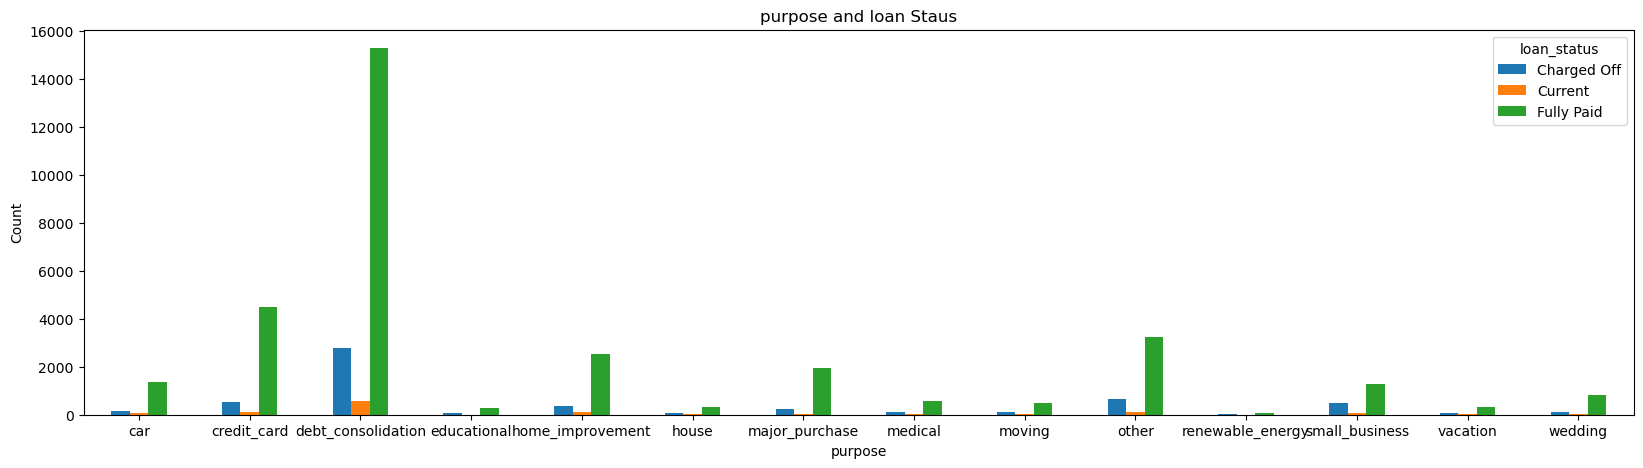

In [74]:
object_cols_filled.purpose.value_counts()

cross_tab = pd.crosstab(object_cols_filled['purpose'], object_cols_filled['loan_status'])
# Print the cross-tabulation
print(cross_tab)

# Plot the cross-tabulation as a bar chart

cross_tab.plot(kind='bar', rot=0,figsize = (20,5))
plt.xlabel('purpose')
plt.ylabel('Count')
plt.title('purpose and loan Staus')
plt.legend(title='loan_status')
plt.show()

In [ ]:
Conclusion 4: From the above graph and numbers it is likely that loan taken from purpose of small business and renewable energy are ar very high risk.
    

We can readily eliminate columns where the number of unique values is excessively high or there exists only a single unique value.

In [76]:
# Get unique values for each column
for column in object_cols_filled.columns:
    unique_values = object_cols_filled[column].nunique()
    print(f'Unique values for {column}: {unique_values}')

Unique values for term: 2
Unique values for int_rate: 371
Unique values for grade: 7
Unique values for sub_grade: 35
Unique values for emp_title: 28820
Unique values for emp_length: 11
Unique values for home_ownership: 5
Unique values for verification_status: 3
Unique values for issue_d: 55
Unique values for loan_status: 3
Unique values for pymnt_plan: 1
Unique values for url: 39717
Unique values for purpose: 14
Unique values for title: 19615
Unique values for zip_code: 823
Unique values for addr_state: 50
Unique values for earliest_cr_line: 526
Unique values for revol_util: 1089
Unique values for initial_list_status: 1
Unique values for last_pymnt_d: 101
Unique values for last_credit_pull_d: 106
Unique values for application_type: 1


In [77]:
## we can drop this column
drop_columns = ['sub_grade','emp_title','pymnt_plan','url','title','zip_code','earliest_cr_line','initial_list_status','application_type']

In [78]:
object_cols_filled =object_cols_filled.drop(columns=drop_columns)

In [79]:
# Get unique values for each column
for column in object_cols_filled.columns:
    unique_values = object_cols_filled[column].nunique()
    print(f'Unique values for {column}: {unique_values}')

Unique values for term: 2
Unique values for int_rate: 371
Unique values for grade: 7
Unique values for emp_length: 11
Unique values for home_ownership: 5
Unique values for verification_status: 3
Unique values for issue_d: 55
Unique values for loan_status: 3
Unique values for purpose: 14
Unique values for addr_state: 50
Unique values for revol_util: 1089
Unique values for last_pymnt_d: 101
Unique values for last_credit_pull_d: 106


loan_status          Charged Off  Current  Fully Paid
verification_status                                  
Not Verified                2142      227       14552
Source Verified             1434      310        8243
Verified                    2051      603       10155


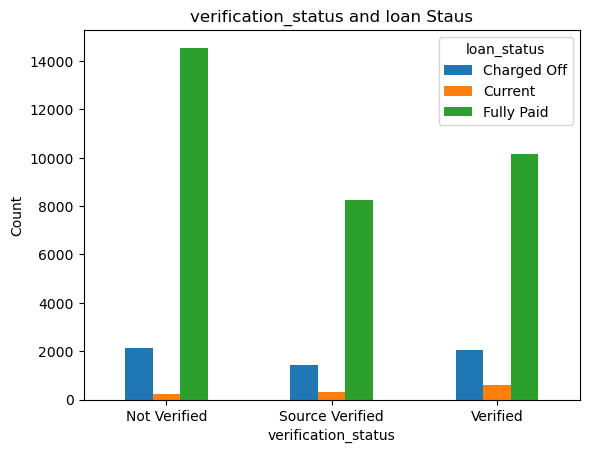

In [80]:
object_cols_filled.verification_status.value_counts()

cross_tab = pd.crosstab(object_cols_filled['verification_status'], object_cols_filled['loan_status'])
# Print the cross-tabulation
print(cross_tab)

# Plot the cross-tabulation as a bar chart

cross_tab.plot(kind='bar', rot=0)
plt.xlabel('verification_status')
plt.ylabel('Count')
plt.title('verification_status and loan Staus')
plt.legend(title='loan_status')
plt.show()

Conclusion 5: It is surprising to observe that individuals without a verification status appear to have a higher likelihood of repaying the loan.
    

loan_status  Charged Off  Current  Fully Paid
grade                                        
A                    602       40        9443
B                   1425      345       10250
C                   1347      264        6487
D                   1118      222        3967
E                    715      179        1948
F                    319       73         657
G                    101       17         198


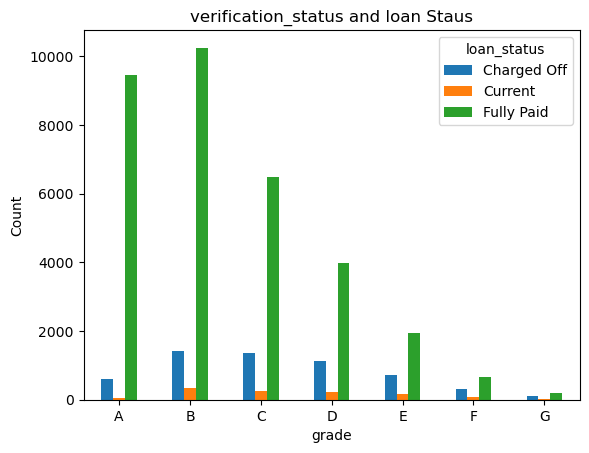

In [31]:
object_cols_filled.grade.value_counts()

cross_tab = pd.crosstab(object_cols_filled['grade'], object_cols_filled['loan_status'])
# Print the cross-tabulation
print(cross_tab)

# Plot the cross-tabulation as a bar chart

cross_tab.plot(kind='bar', rot=0)
plt.xlabel('grade')
plt.ylabel('Count')
plt.title('verification_status and loan Staus')
plt.legend(title='loan_status')
plt.show()

In [ ]:
Conclusion 6: Loan belongs to  D,E, F and G grades are very risky.

loan_status  Charged Off  Current  Fully Paid
addr_state                                   
AK                    15        2          63
AL                    54       17         381
AR                    27       10         208
AZ                   123       30         726
CA                  1125      150        5824
CO                    98       26         668
CT                    94       25         632
DC                    15        3         196
DE                    12        1         101
FL                   504       85        2277
GA                   215       39        1144
HI                    28        8         138
IA                     0        0           5
ID                     1        0           5
IL                   197       47        1281
IN                     0        0           9
KS                    31       16         224
KY                    45       14         266
LA                    53        9         374
MA                   159       43 

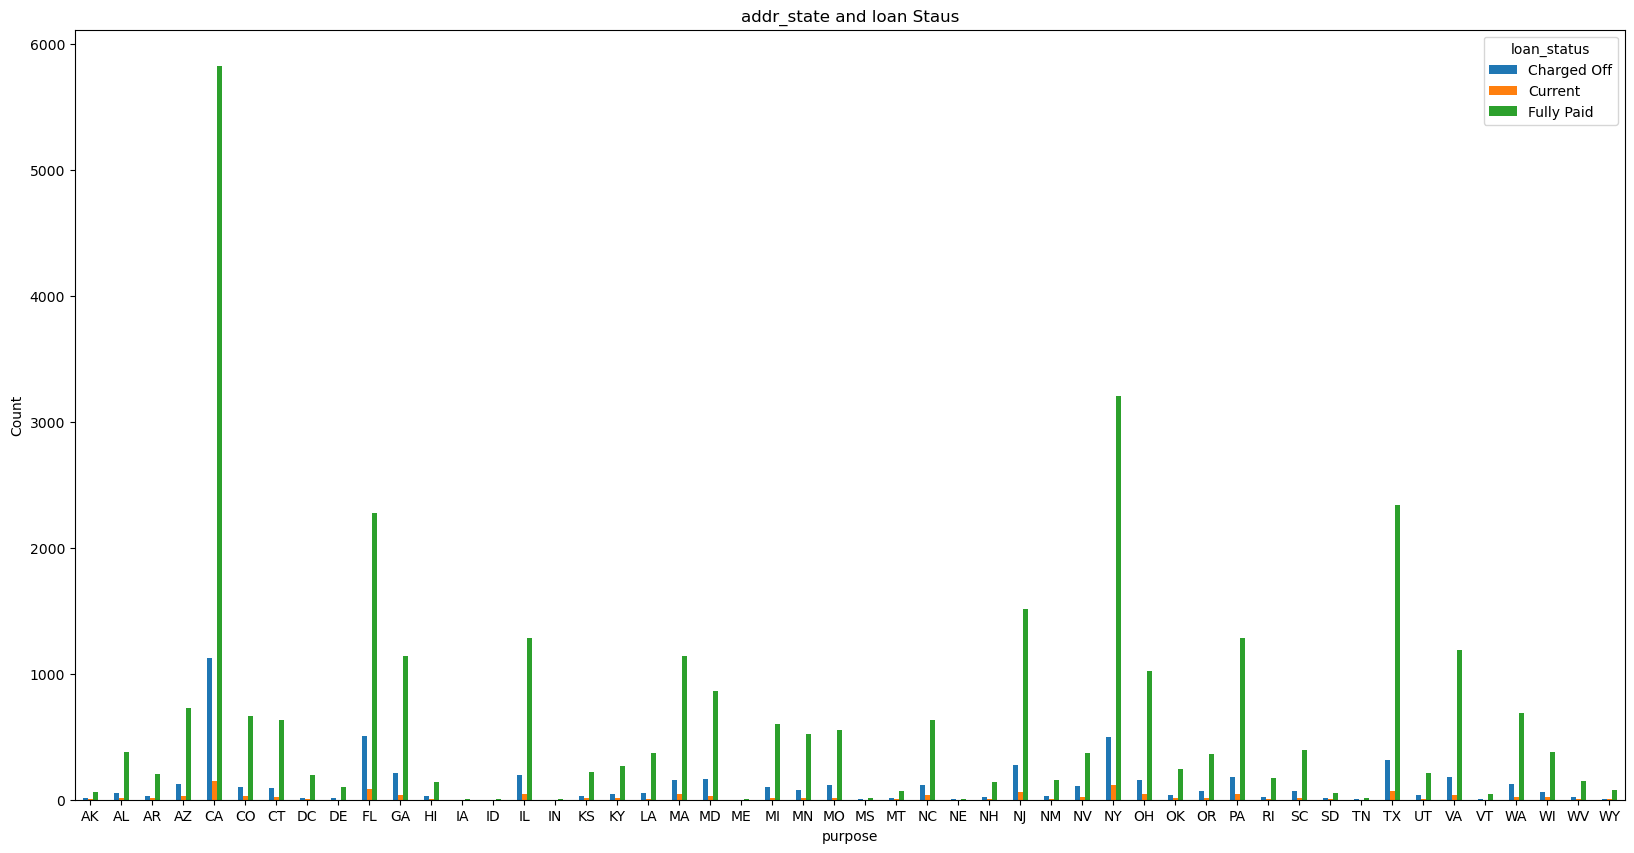

In [33]:
object_cols_filled.addr_state.value_counts()

cross_tab = pd.crosstab(object_cols_filled['addr_state'], object_cols_filled['loan_status'])
# Print the cross-tabulation
print(cross_tab)

# Plot the cross-tabulation as a bar chart

cross_tab.plot(kind='bar', rot=0,figsize = (20,10))
plt.xlabel('addr_state')
plt.ylabel('Count')
plt.title('addr_state and loan Staus')
plt.legend(title='loan_status')
plt.show()

In [82]:
## Extracting month and year
month_year = object_cols_filled['issue_d'].str.partition("-", True)     
object_cols_filled['issue_month']=month_year[0]                       
object_cols_filled['issue_year']='20' + month_year[2]

loan_status  Charged Off  Current  Fully Paid
issue_year                                   
2007                  45        0         206
2008                 247        0        1315
2009                 594        0        4122
2010                1485        0       10047
2011                3256     1140       17260


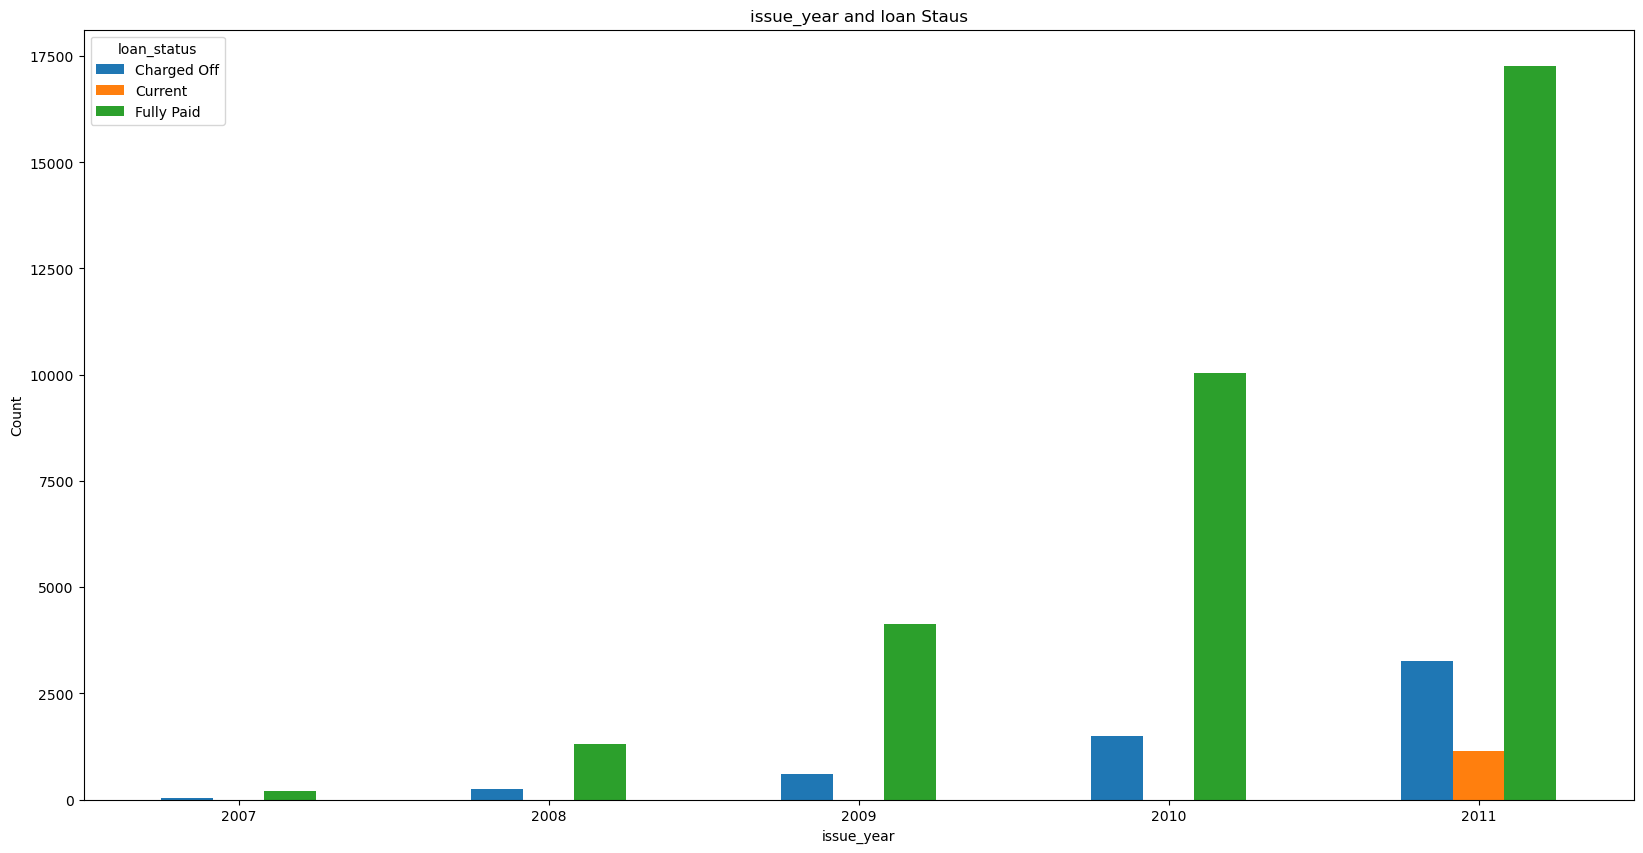

In [84]:
object_cols_filled.addr_state.value_counts()

cross_tab = pd.crosstab(object_cols_filled['issue_year'], object_cols_filled['loan_status'])
# Print the cross-tabulation
print(cross_tab)

# Plot the cross-tabulation as a bar chart

cross_tab.plot(kind='bar', rot=0,figsize = (20,10))
plt.xlabel('issue_year')
plt.ylabel('Count')
plt.title('issue_year and loan Staus')
plt.legend(title='loan_status')
plt.show()

loan_status  Charged Off  Current  Fully Paid
issue_month                                  
Apr                  370        3        2461
Aug                  468      130        2920
Dec                  678      218        3537
Feb                  290        0        2068
Jan                  321        0        2058
Jul                  479      125        2872
Jun                  483       99        2697
Mar                  347        1        2344
May                  466       80        2453
Nov                  598      161        3408
Oct                  580      173        3181
Sep                  547      150        2951


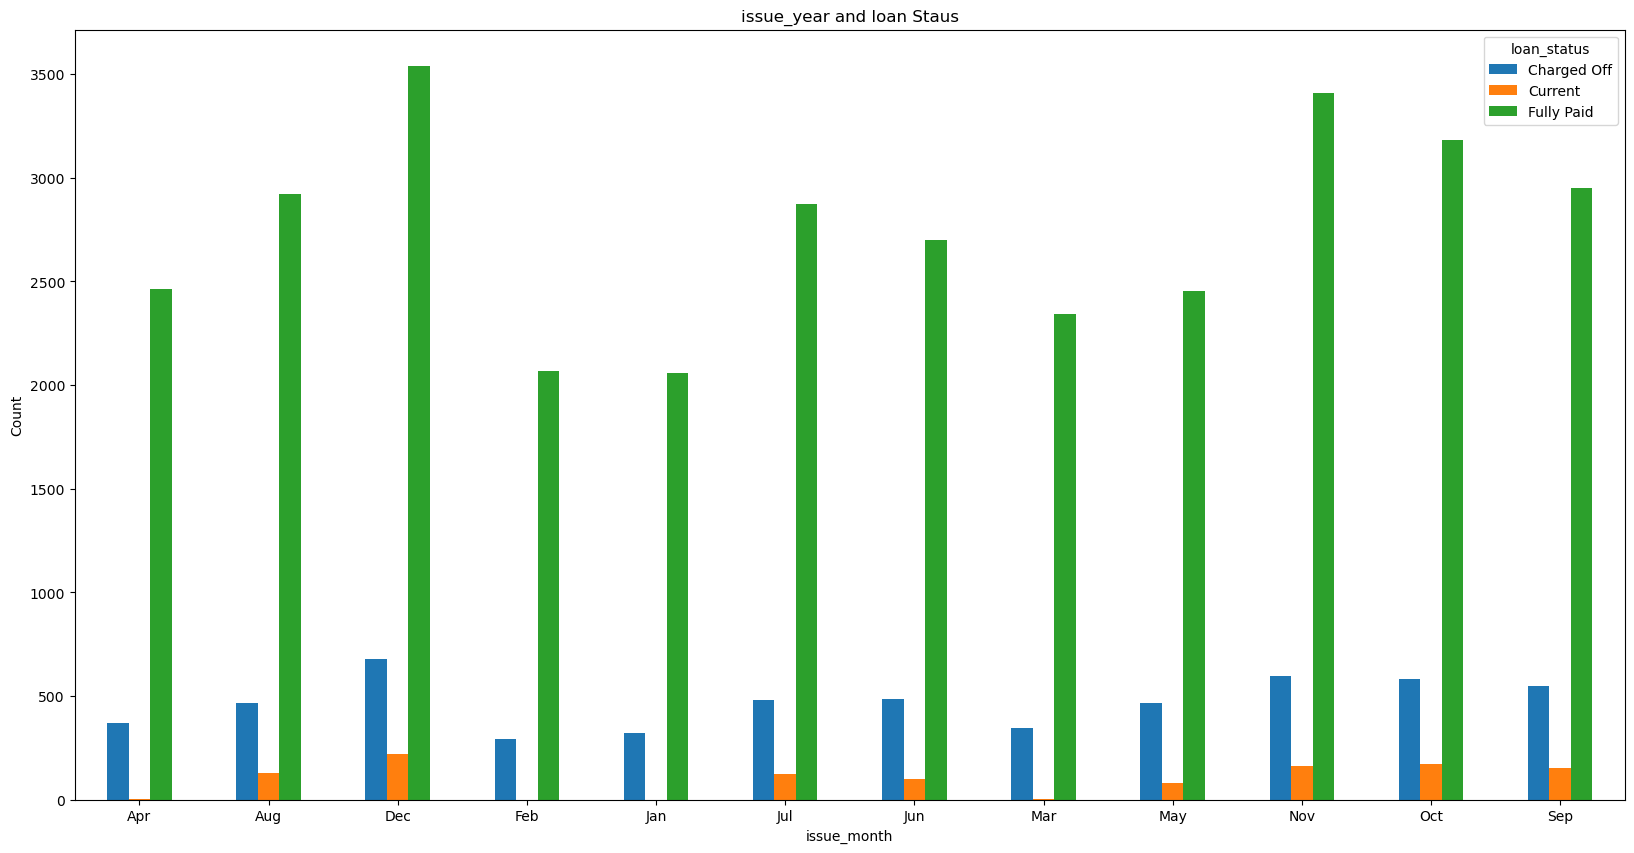

In [85]:
object_cols_filled.addr_state.value_counts()

cross_tab = pd.crosstab(object_cols_filled['issue_month'], object_cols_filled['loan_status'])
# Print the cross-tabulation
print(cross_tab)

# Plot the cross-tabulation as a bar chart

cross_tab.plot(kind='bar', rot=0,figsize = (20,10))
plt.xlabel('issue_month')
plt.ylabel('Count')
plt.title('issue_year and loan Staus')
plt.legend(title='loan_status')
plt.show()

Conclusion 7: Loans issued in the latter part of the year exhibit a higher likelihood of being charged off. (From July to december)

## Analysis of Numerical varibale

In [34]:
numerical_cols_filled.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,162.87,24000.0,27.65,0,1,...,0.00,0.00,171.62,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,59.83,30000.0,1.00,0,5,...,117.08,1.11,119.66,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,84.33,12252.0,8.72,0,2,...,0.00,0.00,649.91,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,339.31,49200.0,20.00,0,1,...,0.00,0.00,357.48,0.0,1,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,67.79,80000.0,17.94,0,0,...,0.00,0.00,67.79,0.0,1,0,0.0,0,0.0,0.0


Add two columns int_rate and revol_util from objective columns.

In [35]:
numerical_cols = pd.concat([numerical_cols_filled, object_cols_filled[["int_rate","revol_util"]]],axis =1)

In [86]:
# Get unique values for each column
for column in numerical_cols.columns:
    unique_values = numerical_cols[column].nunique()
    print(f'Unique values for {column}: {unique_values}')

Unique values for id: 39717
Unique values for member_id: 39692
Unique values for loan_amnt: 833
Unique values for funded_amnt: 991
Unique values for funded_amnt_inv: 7857
Unique values for installment: 14856
Unique values for annual_inc: 4913
Unique values for dti: 2868
Unique values for delinq_2yrs: 1
Unique values for inq_last_6mths: 4
Unique values for open_acc: 20
Unique values for pub_rec: 1
Unique values for revol_bal: 19315
Unique values for total_acc: 52
Unique values for out_prncp: 1
Unique values for out_prncp_inv: 1
Unique values for total_pymnt: 36536
Unique values for total_pymnt_inv: 36096
Unique values for total_rec_prncp: 7818
Unique values for total_rec_int: 32047
Unique values for total_rec_late_fee: 1
Unique values for recoveries: 1
Unique values for collection_recovery_fee: 1
Unique values for last_pymnt_amnt: 30655
Unique values for collections_12_mths_ex_med: 1
Unique values for policy_code: 1
Unique values for acc_now_delinq: 1
Unique values for chargeoff_within_

In [88]:
drop_columns =  ["id","member_id","delinq_2yrs","pub_rec","out_prncp","out_prncp_inv","total_rec_late_fee","recoveries","total_rec_late_fee","collection_recovery_fee","collections_12_mths_ex_med","policy_code","acc_now_delinq","chargeoff_within_12_mths","delinq_amnt","pub_rec_bankruptcies","tax_liens"]

All the columns include id, member id and which have only 1 unique value are dropped from numerical columns.

In [89]:
numerical_cols =numerical_cols.drop(columns=drop_columns)

Handle_outlier in numerical column is very important. To drop that we are defining the upper bound and lower bound.

In [92]:


def handle_outliers(df, multiplier=1.5):

    for column_name in df.columns:
        column = df[column_name]
        # Calculate the IQR
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        df[column_name] = df[column_name].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))


    return df



In [93]:
numerical_cols = handle_outliers(numerical_cols)

In [94]:
###
numerical_cols.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,inq_last_6mths,open_acc,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,int_rate,revol_util
0,5000.0,5000.0,4975.0,162.87,24000.0,27.65,1.0,3.0,13648.0,9.0,5863.155187,5833.84,5000.00,863.16,171.62,10.65,83.7
1,2500.0,2500.0,2500.0,59.83,30000.0,1.00,2.5,3.0,1687.0,4.0,1008.710000,1008.71,456.46,435.17,119.66,15.27,9.4
2,2400.0,2400.0,2400.0,84.33,12252.0,8.72,2.0,2.0,2956.0,10.0,3005.666844,3005.67,2400.00,605.67,649.91,15.96,98.5
3,10000.0,10000.0,10000.0,339.31,49200.0,20.00,1.0,10.0,5598.0,37.0,12231.890000,12231.89,10000.00,2214.92,357.48,13.49,21.0
4,3000.0,3000.0,3000.0,67.79,80000.0,17.94,0.0,15.0,27783.0,38.0,3513.330000,3513.33,2475.94,1037.39,67.79,12.69,53.9


In [95]:
numerical_cols.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'annual_inc', 'dti', 'inq_last_6mths', 'open_acc', 'revol_bal',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'last_pymnt_amnt', 'int_rate', 'revol_util'],
      dtype='object')

## Univariate analyis of numerical columns

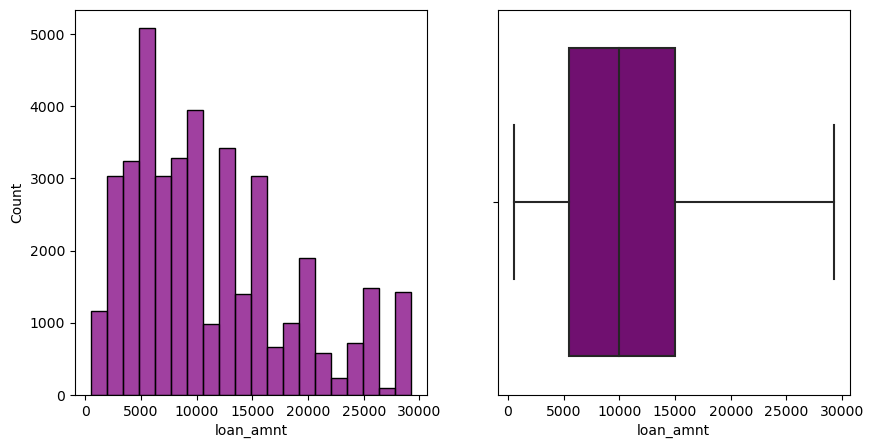

In [47]:
#Histogram and box plots
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
sns.histplot(numerical_cols, x="loan_amnt", bins=20,  color='purple',kde=False, ax=axs[0])
#axs[0].set_title('Histogram of BANK_INVESTMENT')
sns.boxplot(numerical_cols, x="loan_amnt", color='purple', ax=axs[1])
#axs[1].set_title('Boxplot of BANK_INVESTMENT')
plt.show()

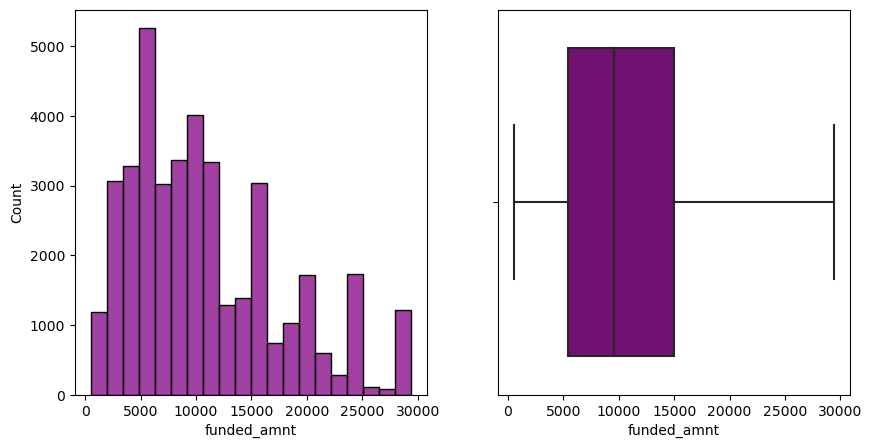

In [97]:
#Histogram and box plots
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
sns.histplot(numerical_cols, x="funded_amnt", bins=20,  color='purple',kde=False, ax=axs[0])
#axs[0].set_title('Histogram of BANK_INVESTMENT')
sns.boxplot(numerical_cols, x="funded_amnt", color='purple', ax=axs[1])
#axs[1].set_title('Boxplot of BANK_INVESTMENT')
plt.show()

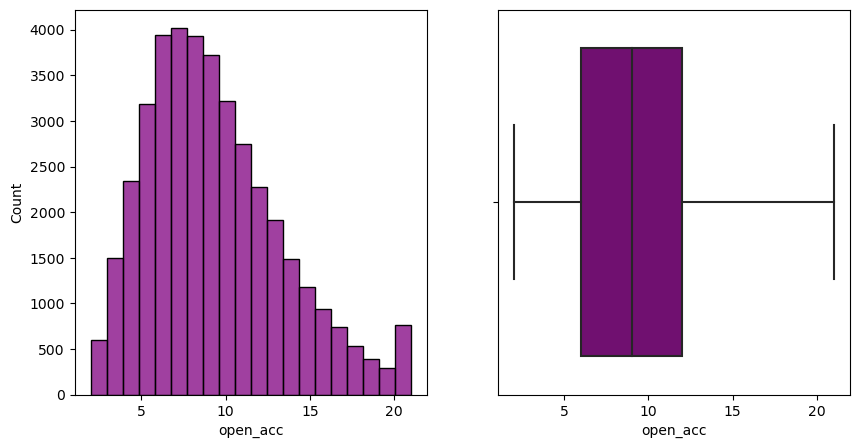

In [98]:
#Histogram and box plots
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
sns.histplot(numerical_cols, x="open_acc", bins=20,  color='purple',kde=False, ax=axs[0])
#axs[0].set_title('Histogram of BANK_INVESTMENT')
sns.boxplot(numerical_cols, x="open_acc", color='purple', ax=axs[1])
#axs[1].set_title('Boxplot of BANK_INVESTMENT')
plt.show()

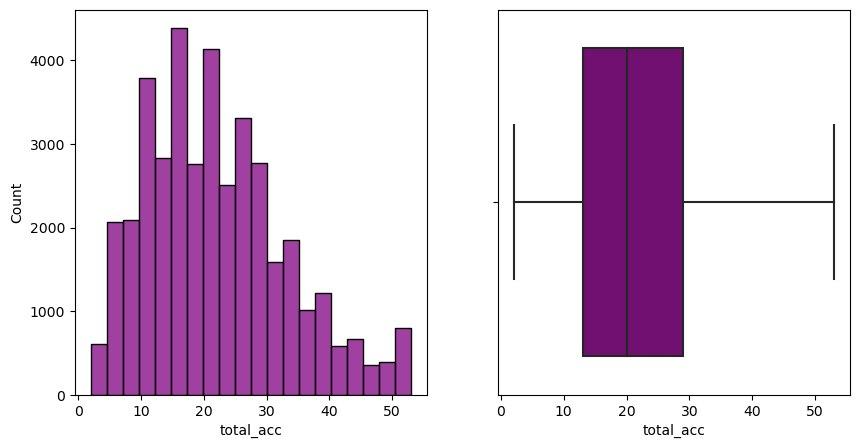

In [99]:
#Histogram and box plots
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
sns.histplot(numerical_cols, x="total_acc", bins=20,  color='purple',kde=False, ax=axs[0])
#axs[0].set_title('Histogram of BANK_INVESTMENT')
sns.boxplot(numerical_cols, x="total_acc", color='purple', ax=axs[1])
#axs[1].set_title('Boxplot of BANK_INVESTMENT')
plt.show()

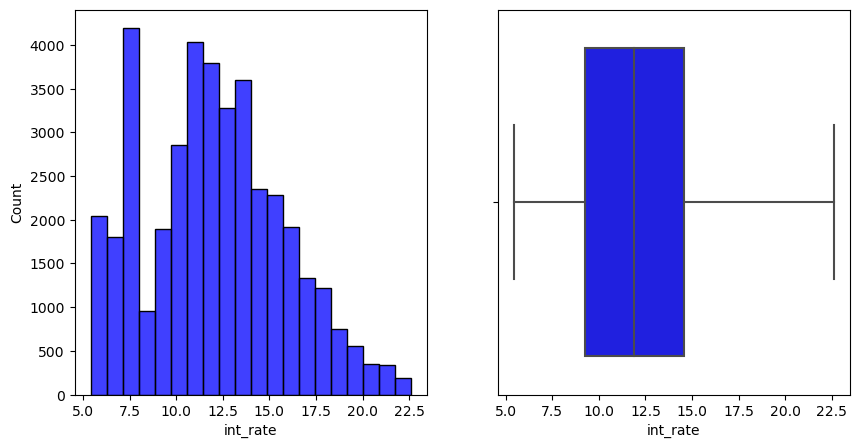

In [48]:
#Histogram and box plots
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
sns.histplot(numerical_cols, x="int_rate", bins=20,  color='blue',kde=False, ax=axs[0])
#axs[0].set_title('Histogram of BANK_INVESTMENT')
sns.boxplot(numerical_cols, x="int_rate", color='blue', ax=axs[1])
#axs[1].set_title('Boxplot of BANK_INVESTMENT')
plt.show()

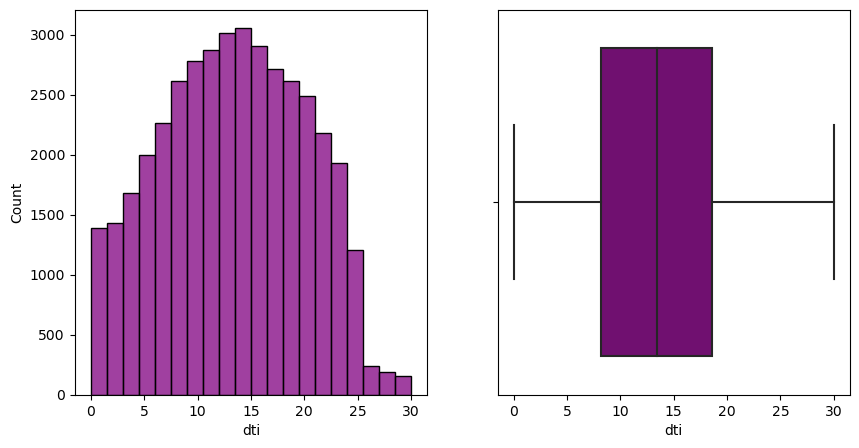

In [49]:
#Histogram and box plots
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
sns.histplot(numerical_cols, x="dti", bins=20,  color='purple',kde=False, ax=axs[0])
#axs[0].set_title('Histogram of BANK_INVESTMENT')
sns.boxplot(numerical_cols, x="dti", color='purple', ax=axs[1])
#axs[1].set_title('Boxplot of BANK_INVESTMENT')
plt.show()

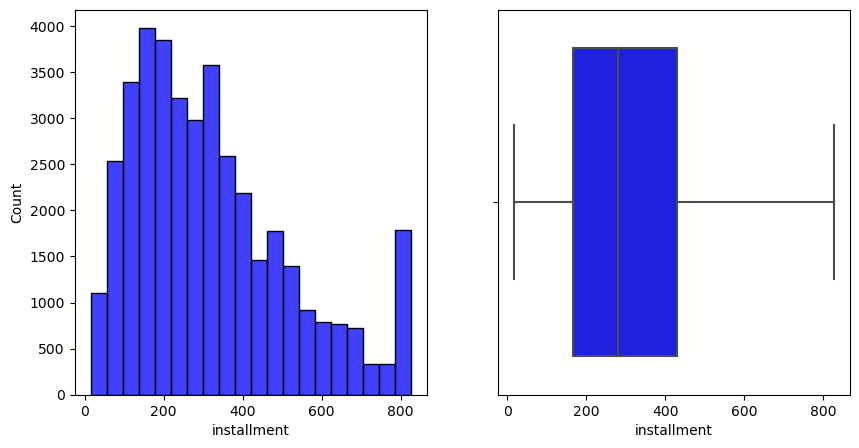

In [50]:
#Histogram and box plots
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
sns.histplot(numerical_cols, x="installment", bins=20,  color='blue',kde=False, ax=axs[0])
#axs[0].set_title('Histogram of BANK_INVESTMENT')
sns.boxplot(numerical_cols, x="installment", color='blue', ax=axs[1])
#axs[1].set_title('Boxplot of BANK_INVESTMENT')
plt.show()

## Bivariate analyis of numerical columns and our target column

In [51]:
numerical_cols_target = pd.concat([numerical_cols, object_cols_filled[["loan_status"]]],axis =1)

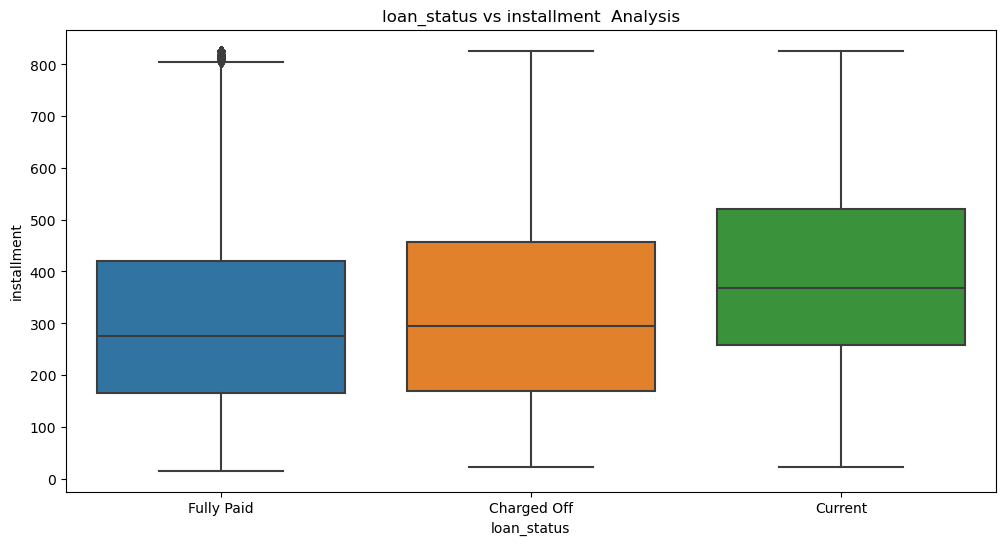

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='installment', data=numerical_cols_target)
plt.title('loan_status vs installment  Analysis')
plt.show()

Conclusion 8: From the above graph and numbers it is likely that charge off loan has high average of installments in comparison to fully paid loans.
    

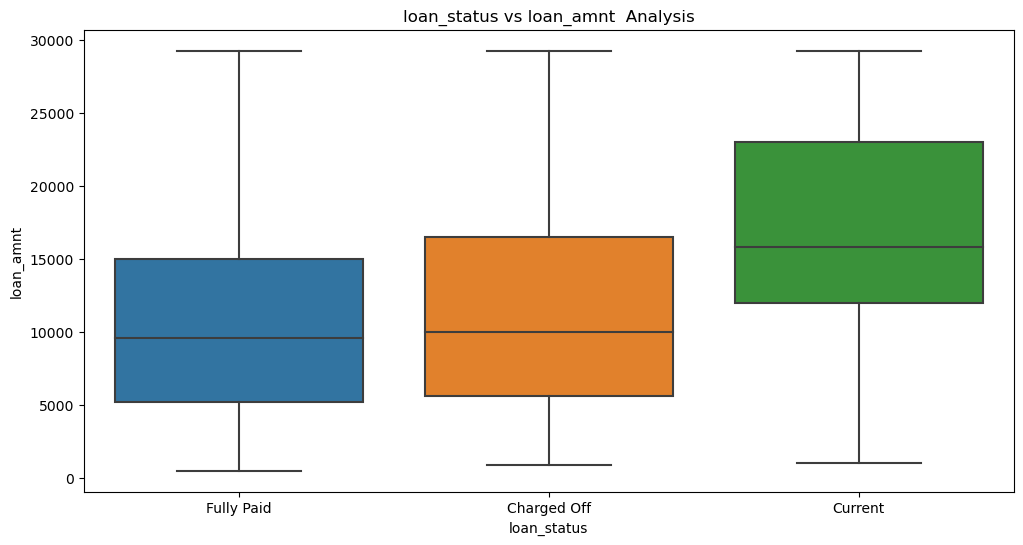

In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=numerical_cols_target)
plt.title('loan_status vs loan_amnt  Analysis')
plt.show()

Conclusion 9: From the above graph and numbers it is likely that loan above 15000 is likely to be charged off.
    

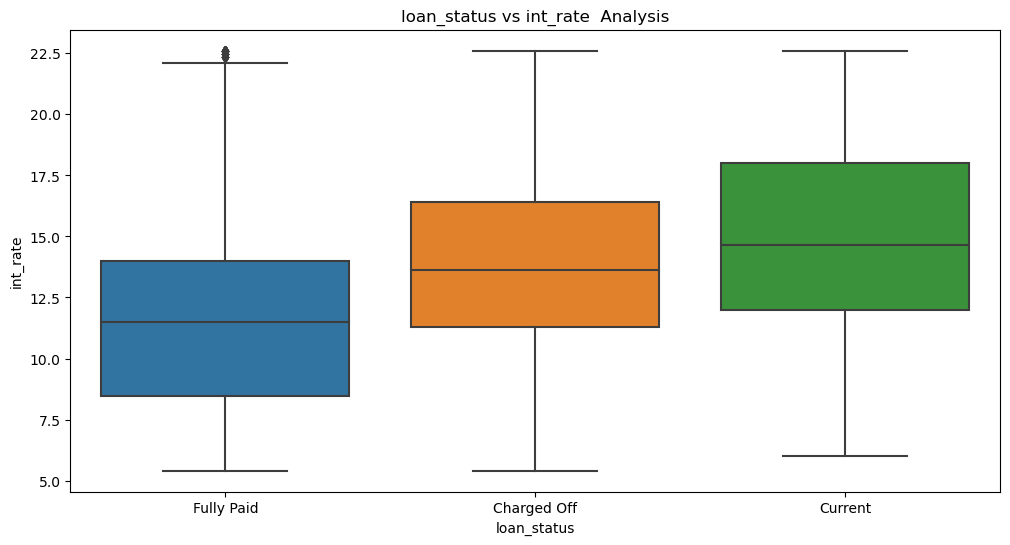

In [54]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='int_rate', data=numerical_cols_target)
plt.title('loan_status vs int_rate  Analysis')
plt.show()

Conclusion 9: From the above graph and numbers it is likely that charged off loan has high interest in comparison to fully paid loans.
    

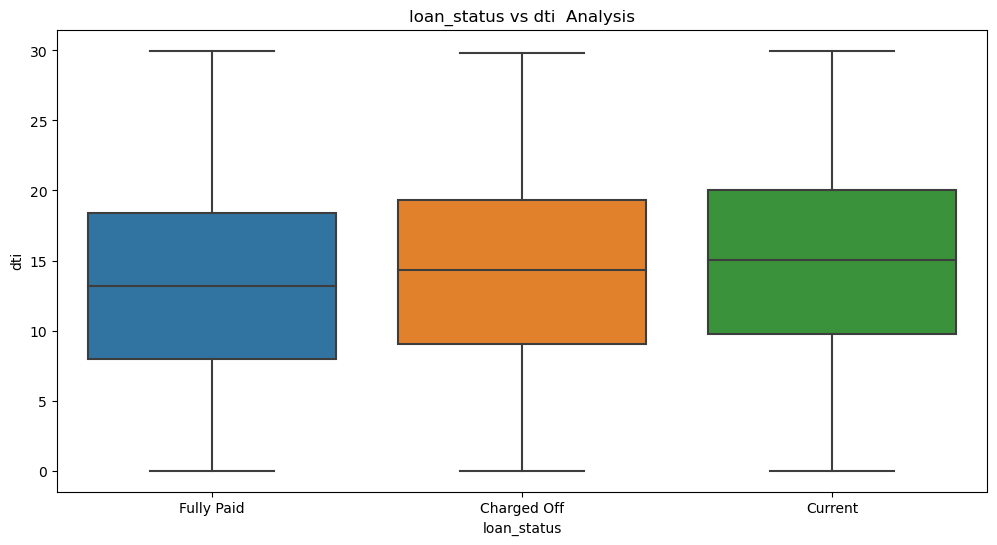

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='dti', data=numerical_cols_target)
plt.title('loan_status vs dti  Analysis')
plt.show()

Conclusion 10: Based on the provided graph, it is evident that individuals with a lower debt-to-income (dti) ratio have a higher likelihood of successfully repaying the loan.

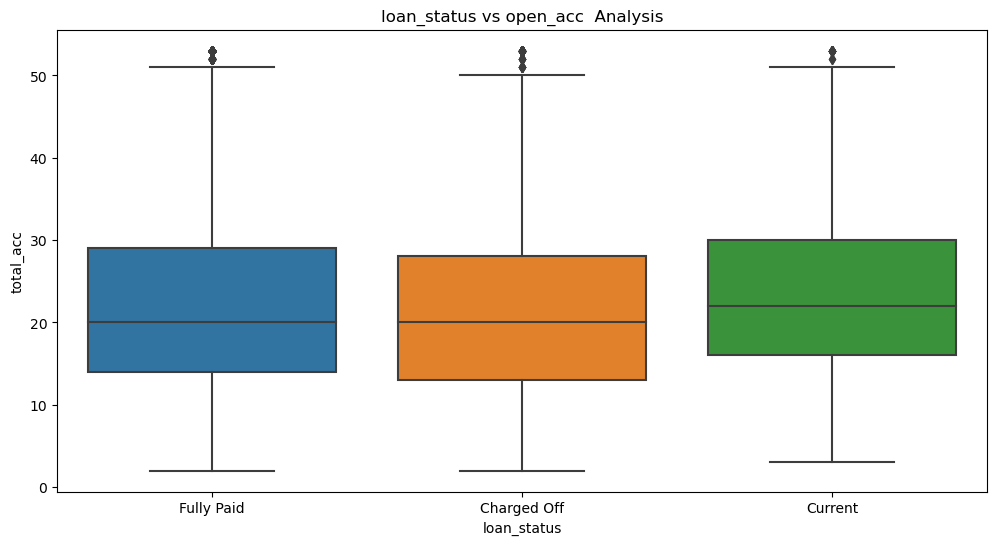

In [109]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='total_acc', data=numerical_cols_target)
plt.title('loan_status vs open_acc  Analysis')
plt.show()

Let us try to Create bins for some numerical variable to make them categorical and analyze it from different angle.

In [58]:
numerical_cols_target.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,int_rate,revol_util
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.0,39717.000000,...,39717.000000,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.0,39717.000000,39717.000000
mean,6.831319e+05,8.504688e+05,11101.747363,10854.466601,10293.769847,321.247367,65247.891522,13.315130,0.0,0.797643,...,2091.287589,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.019897,48.770677
std,2.106941e+05,2.656632e+05,7122.427394,6908.767249,6817.628924,198.868773,32703.476426,6.678594,0.0,0.892869,...,2696.321698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.721013,28.367689
min,5.473400e+04,9.594150e+04,500.000000,500.000000,0.000000,15.690000,4000.000000,0.000000,0.0,0.000000,...,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.420000,0.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,40404.000000,8.170000,0.0,0.000000,...,218.680000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.250000,25.300000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,59000.000000,13.400000,0.0,1.000000,...,546.140000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.860000,49.200000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,82300.000000,18.600000,0.0,1.000000,...,3293.160000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14.590000,72.300000
max,1.077501e+06,1.314167e+06,29250.000000,29400.000000,28500.000000,826.420000,145144.000000,29.990000,0.0,2.500000,...,7904.880000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,22.600000,99.900000


In [63]:
pd.cut(numerical_cols_target['installment'], bins=5)

0         (14.879, 177.836]
1         (14.879, 177.836]
2         (14.879, 177.836]
3        (177.836, 339.982]
4         (14.879, 177.836]
                ...        
39712     (14.879, 177.836]
39713    (177.836, 339.982]
39714     (14.879, 177.836]
39715     (14.879, 177.836]
39716    (177.836, 339.982]
Name: installment, Length: 39717, dtype: category
Categories (5, interval[float64, right]): [(14.879, 177.836] < (177.836, 339.982] < (339.982, 502.128] < (502.128, 664.274] < (664.274, 826.42]]

In [111]:
#creating bins for int_rate,annual_inc, revol_til,dti,installment
numerical_cols_target['int_rate_groups'] = pd.cut(numerical_cols_target['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-12%','12%-15%','15%-19%','19%-22%'])
numerical_cols_target['revol_util_groups'] = pd.cut(numerical_cols_target['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
numerical_cols_target['annual_inc_groups'] = pd.cut(numerical_cols_target['annual_inc'], bins=5,precision =0,labels =['3k-32k','32k-60k','60k-88k','88k-116K','116k-145K'])
numerical_cols_target['dti_group'] = pd.cut(numerical_cols_target['dti'], bins=5,precision =0,labels =['0-6','6-12','12-18','18-24','24-30'])
numerical_cols_target['installment_group'] = pd.cut(numerical_cols_target['installment'], bins=5,precision =0,labels =['14-177','177-339','339-502','502-664','664-826'])

loan_status      Charged Off  Current  Fully Paid
int_rate_groups                                  
5%-9%                    506       26        8462
9%-12%                  1489      282       10799
12%-15%                 1926      328        9258
15%-19%                 1254      331        3631
19%-22%                  452      173         800


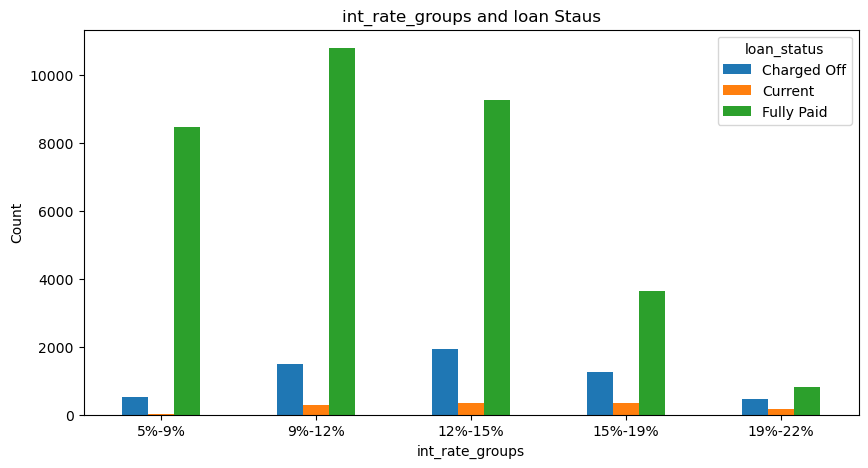

In [112]:

cross_tab = pd.crosstab(numerical_cols_target['int_rate_groups'], object_cols_filled['loan_status'])
# Print the cross-tabulation
print(cross_tab)

# Plot the cross-tabulation as a bar chart

cross_tab.plot(kind='bar', rot=0,figsize = (10,5))
plt.xlabel('int_rate_groups')
plt.ylabel('Count')
plt.title('int_rate_groups and loan Staus')
plt.legend(title='loan_status')
plt.show()

loan_status        Charged Off  Current  Fully Paid
annual_inc_groups                                  
3k-32k                     961       88        4246
32k-60k                   2522      436       13262
60k-88k                   1244      316        8207
88k-116K                   478      157        3874
116k-145K                  422      143        3361


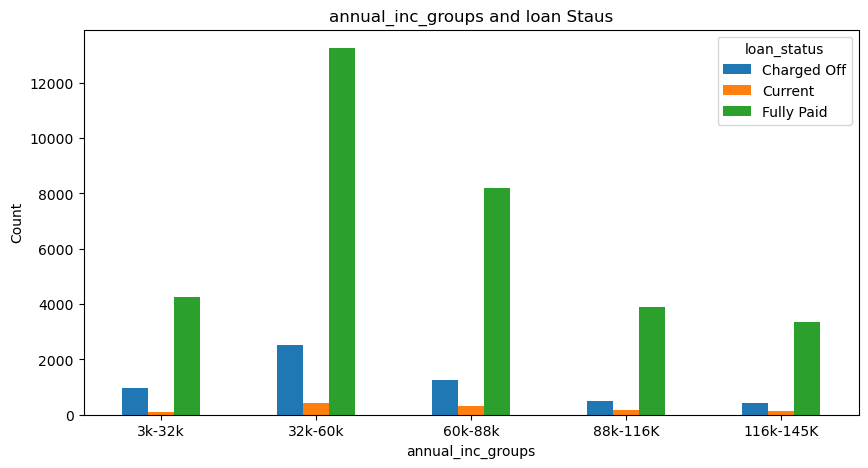

In [67]:

cross_tab = pd.crosstab(numerical_cols_target['annual_inc_groups'], object_cols_filled['loan_status'])
# Print the cross-tabulation
print(cross_tab)

# Plot the cross-tabulation as a bar chart

cross_tab.plot(kind='bar', rot=0,figsize = (10,5))
plt.xlabel('annual_inc_groups')
plt.ylabel('Count')
plt.title('annual_inc_groups and loan Staus')
plt.legend(title='loan_status')
plt.show()

loan_status  Charged Off  Current  Fully Paid
dti_group                                    
0-6                  770      126        5602
6-12                1359      286        8883
12-18               1722      338        9627
18-24               1511      291        7407
24-30                265       99        1431


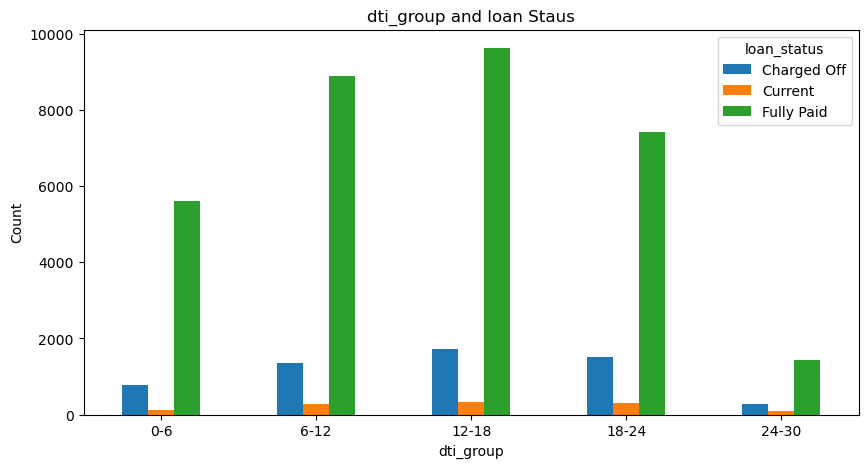

In [68]:

cross_tab = pd.crosstab(numerical_cols_target['dti_group'], object_cols_filled['loan_status'])
# Print the cross-tabulation
print(cross_tab)

# Plot the cross-tabulation as a bar chart

cross_tab.plot(kind='bar', rot=0,figsize = (10,5))
plt.xlabel('dti_group')
plt.ylabel('Count')
plt.title('dti_group and loan Staus')
plt.legend(title='loan_status')
plt.show()

loan_status        Charged Off  Current  Fully Paid
installment_group                                  
14-177                    1551      175        9284
177-339                   1757      327       11550
339-502                   1185      315        6523
502-664                    627      211        3037
664-826                    507      112        2556


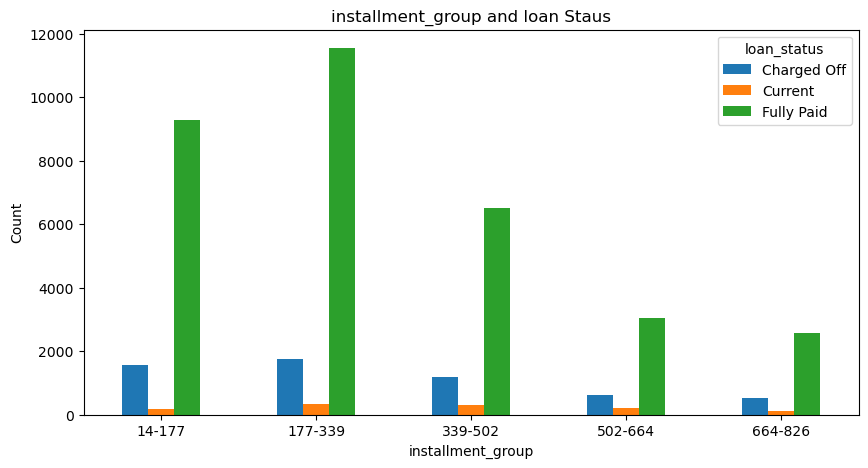

In [69]:

cross_tab = pd.crosstab(numerical_cols_target['installment_group'], object_cols_filled['loan_status'])
# Print the cross-tabulation
print(cross_tab)

# Plot the cross-tabulation as a bar chart

cross_tab.plot(kind='bar', rot=0,figsize = (10,5))
plt.xlabel('installment_group')
plt.ylabel('Count')
plt.title('installment_group and loan Staus')
plt.legend(title='loan_status')
plt.show()